In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_data(data_file_path):
    """ Загрузка данных. """
    with open(data_file_path) as input_file:
        X = list()  # Предикторы
        y = list()  # Таргеты
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)  # Для удобства добавим в вектор признаков 𝑥 фиктивный признак - 1
            y.append(label)
        return np.array(X, dtype=float), np.array(y, dtype=float)

In [3]:
def compute_hypothesis(X, theta):
    """ Вычисление предсказания нашей модели. """
    return np.matmul(X, theta)


def compute_cost(X, y, theta):
    """ Вычисление функции стоимости. """
    m = X.shape[0]  # Количество объектов в выборке
    return 1 / (2 * m) * sum((compute_hypothesis(X, theta) - y) ** 2)


def gradient_descend(X, y, theta, alpha, num_iter):
    """ Реализация градиентного спуска. """
    history = list()
    m = X.shape[0]  # Количество объектов в выборке
    for i in range(num_iter):
        theta_temp = theta
        theta_temp[0] = theta_temp[0] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, 0]) / m
        theta_temp[1] = theta_temp[1] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, 1]) / m
        theta = theta_temp
        history.append(compute_cost(X, y, theta))
    return history, theta

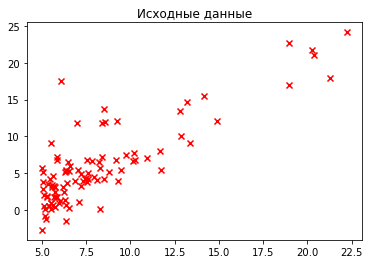

Значение функции стоимости при theta = [0, 0]:  32.072733877455654


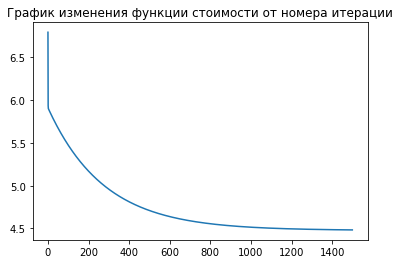

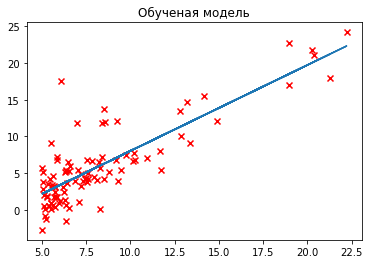

In [4]:
X, y = load_data('../data/ml/linreg/lab1data1.txt')

plt.title('Исходные данные')
plt.scatter(X[:, 1], y, c='r', marker='x')
plt.show()

print('Значение функции стоимости при theta = [0, 0]: ', compute_cost(X, y, np.array([0, 0])))

history, theta = gradient_descend(X, y, np.array([0, 0], float), 0.01, 1500)

plt.title('График изменения функции стоимости от номера итерации')
plt.plot(range(len(history)), history)
plt.show()

plt.title('Обученая модель')
plt.scatter(X[:, 1], y, c='r', marker='x')
plt.plot(X[:, 1], compute_hypothesis(X, theta))
plt.show()